In [1]:
import os
from utils.experiment import *
from utils.transforms import *

Running Experiment >>Test<<


Train progress: [                                ] 0/10 Epoch: --- Loss: ------
Train progress: [                             ] 0/10 Epoch: 1/10 Loss: ↘ 1.0961
Train progress: [--                           ] 1/10 Epoch: 2/10 Loss: ↘ 1.0889
Train progress: [-----                        ] 2/10 Epoch: 3/10 Loss: ↘ 1.0797


Reading data took 0.9s


Train progress: [--------                     ] 3/10 Epoch: 4/10 Loss: ↘ 1.0784
Train progress: [-----------                  ] 4/10 Epoch: 5/10 Loss: ↘ 1.0699
Train progress: [--------------               ] 5/10 Epoch: 6/10 Loss: ↘ 1.0611
Train progress: [-----------------            ] 6/10 Epoch: 7/10 Loss: ↘ 1.0577
Train progress: [--------------------         ] 7/10 Epoch: 8/10 Loss: ↘ 1.0530
Train progress: [-----------------------      ] 8/10 Epoch: 9/10 Loss: ↘ 1.0525
Train progress: [-------------------------   ] 9/10 Epoch: 10/10 Loss: ↘ 1.0342
Train progress: [---------------------------] 10/10 Epoch: 10/10 Loss: ↘ 1.0342
Train progress: [                                ] 0/10 Epoch: --- Loss: ------
Train progress: [                             ] 0/10 Epoch: 1/10 Loss: ↘ 1.1037
Train progress: [--                           ] 1/10 Epoch: 2/10 Loss: ↘ 1.0915
Train progress: [-----                        ] 2/10 Epoch: 3/10 Loss: ↘ 1.0831


1. Training took 0.6s
1. Evaluation took 0.0s


Train progress: [--------                     ] 3/10 Epoch: 4/10 Loss: ↘ 1.0790
Train progress: [-----------                  ] 4/10 Epoch: 5/10 Loss: ↘ 1.0678
Train progress: [--------------               ] 5/10 Epoch: 6/10 Loss: ↘ 1.0577
Train progress: [-----------------            ] 6/10 Epoch: 7/10 Loss: ↘ 1.0565
Train progress: [--------------------         ] 7/10 Epoch: 8/10 Loss: ↘ 1.0419
Train progress: [-----------------------      ] 8/10 Epoch: 9/10 Loss: ↘ 1.0315
Train progress: [-------------------------   ] 9/10 Epoch: 10/10 Loss: ↗ 1.0367
Train progress: [---------------------------] 10/10 Epoch: 10/10 Loss: ↗ 1.0367


2. Training took 0.6s
2. Evaluation took 0.0s
torch.Size([10, 2, 128, 64])
torch.Size([128, 64])
Successfully ran Experiment >>Test<<


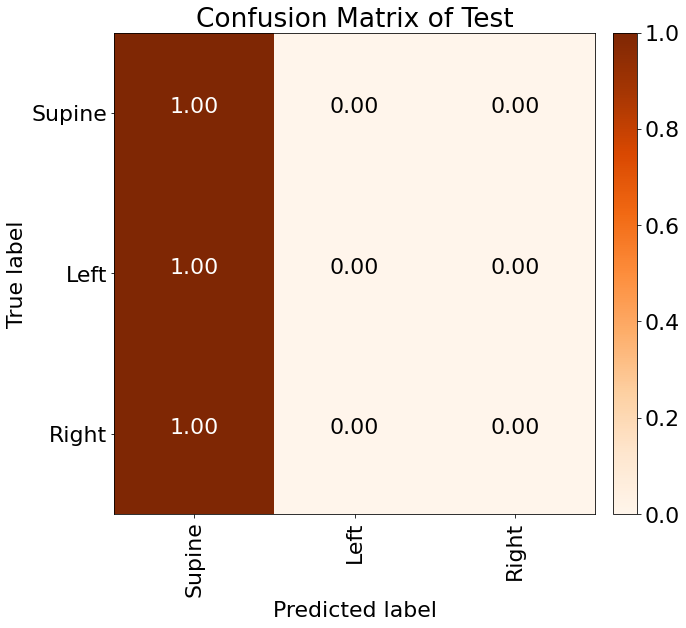

In [3]:
test = Experiment(
    "Test",
    transform=[
        Resize((64, 128)),
        Combine(
            [
                [
                    Standardize(),
                    NormalizeMinMax(),
                    EqualizeHist(),
                    Blur((3, 3)),
                    Threshold(median_larger_zero),
                ],
                [
                    Standardize(),
                    NormalizeMinMax(),
                    EqualizeHist(),
                    Blur((3, 3)),
                    Threshold(median_larger_zero),
                    WarpPolar(),
                ],
            ]
        ),
        ToTensor(),
    ],
    hparams=HParams(num_trainings=2),
)
test.run()


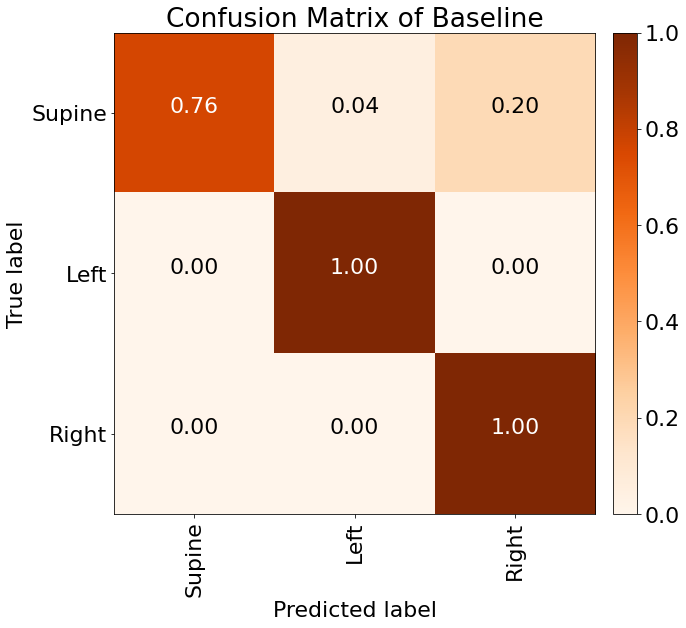

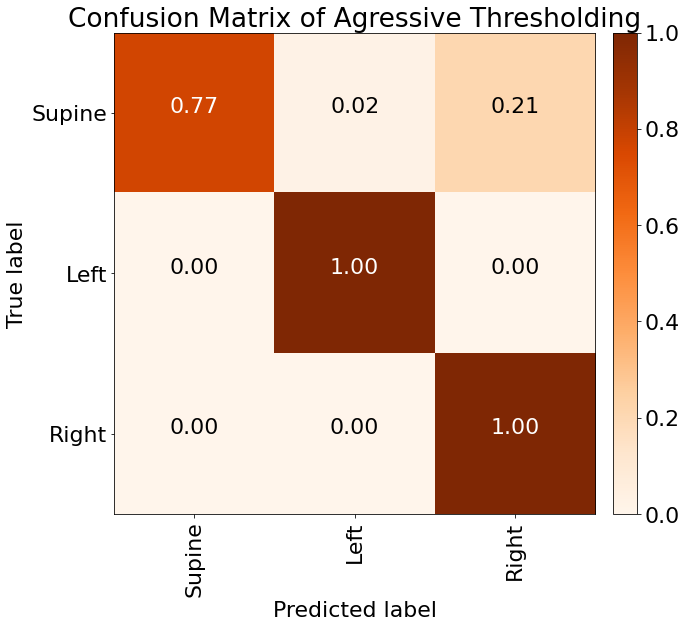

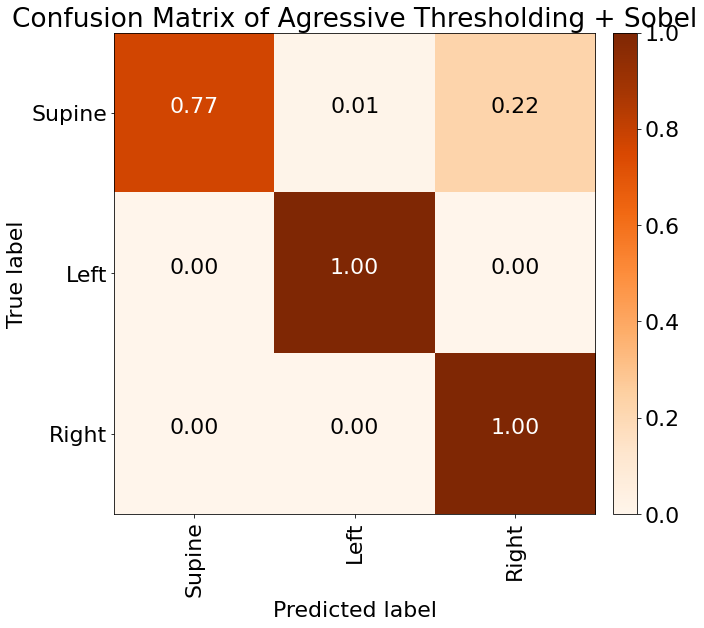

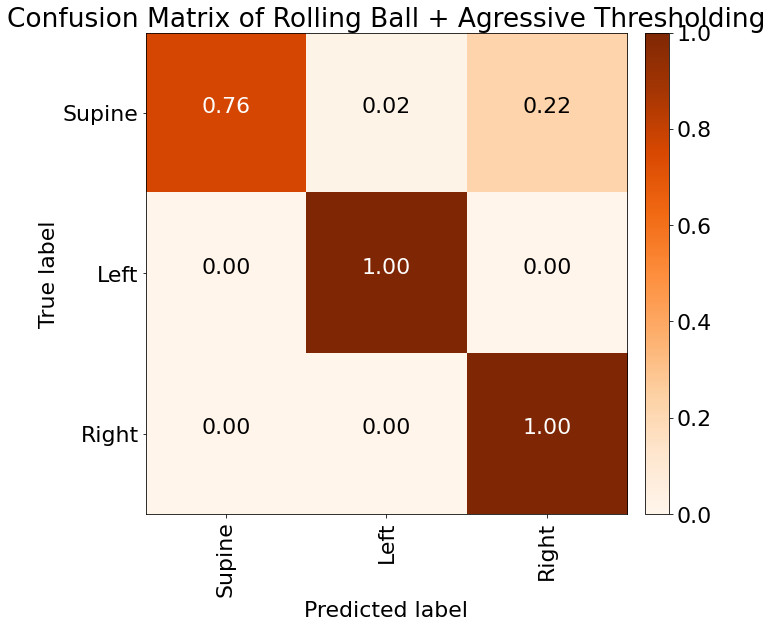

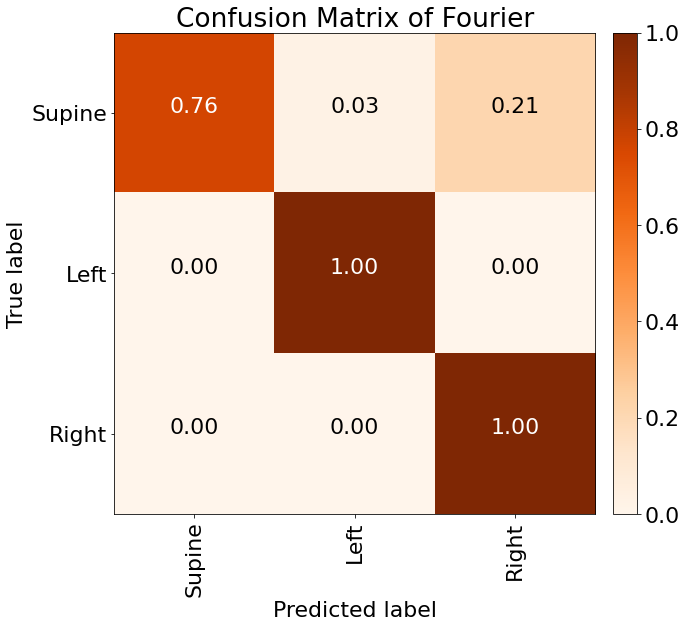

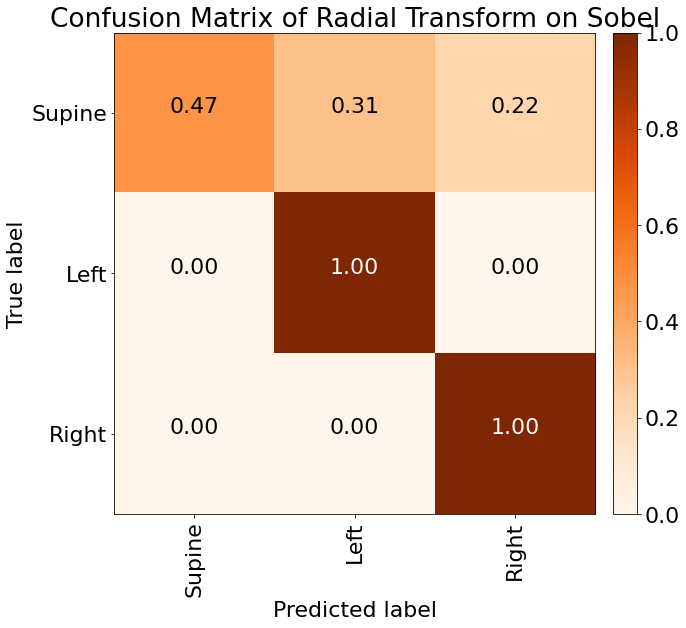

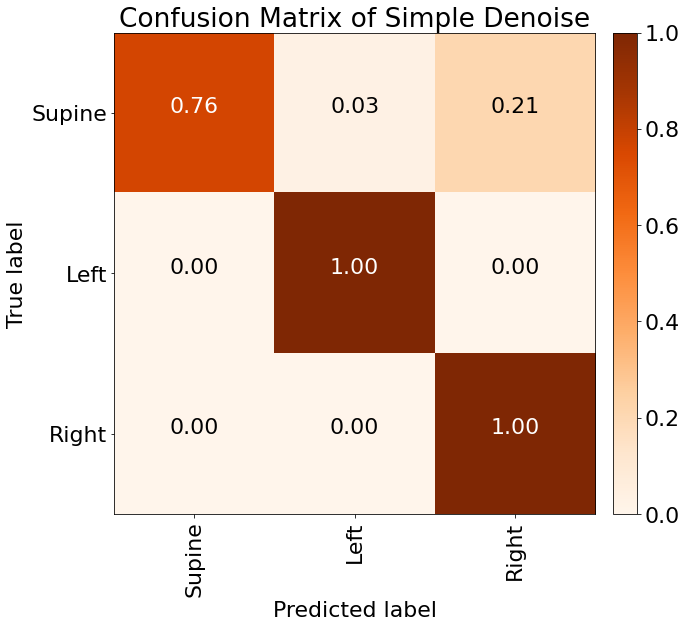

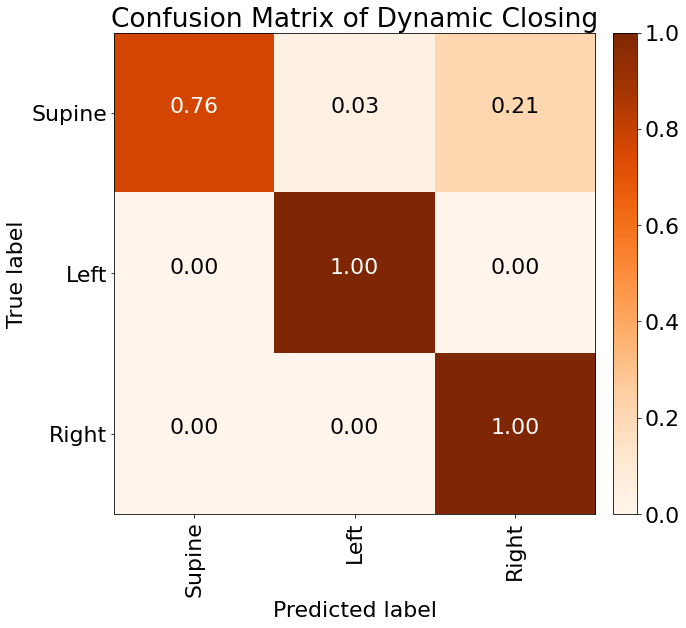

In [2]:
dirs = os.listdir("runs")
for run in dirs:
    Experiment.reevaluate(run)